# MARKETING

#Importing Libraries and Datasets


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
creditcard_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Science for Business/Data Science for Business Package/2. Marketing Department/Marketing_data.csv')

In [4]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
creditcard_df.info()
creditcard_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [7]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760	]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<Axes: >

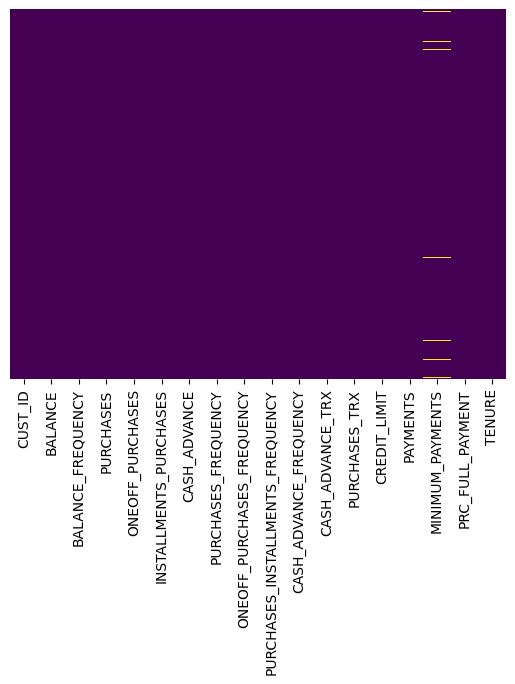

In [8]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [9]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
creditcard_df.loc[creditcard_df['MINIMUM_PAYMENTS'].isnull() == True, 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[creditcard_df['CREDIT_LIMIT'].isnull() == True, 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [11]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: >

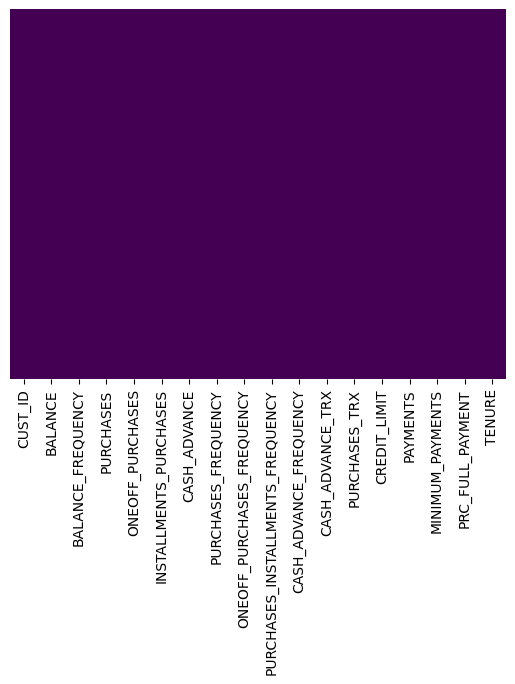

In [12]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
creditcard_df.duplicated().sum()

0

In [14]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [15]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
n = len(creditcard_df.columns)
n

17

In [17]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

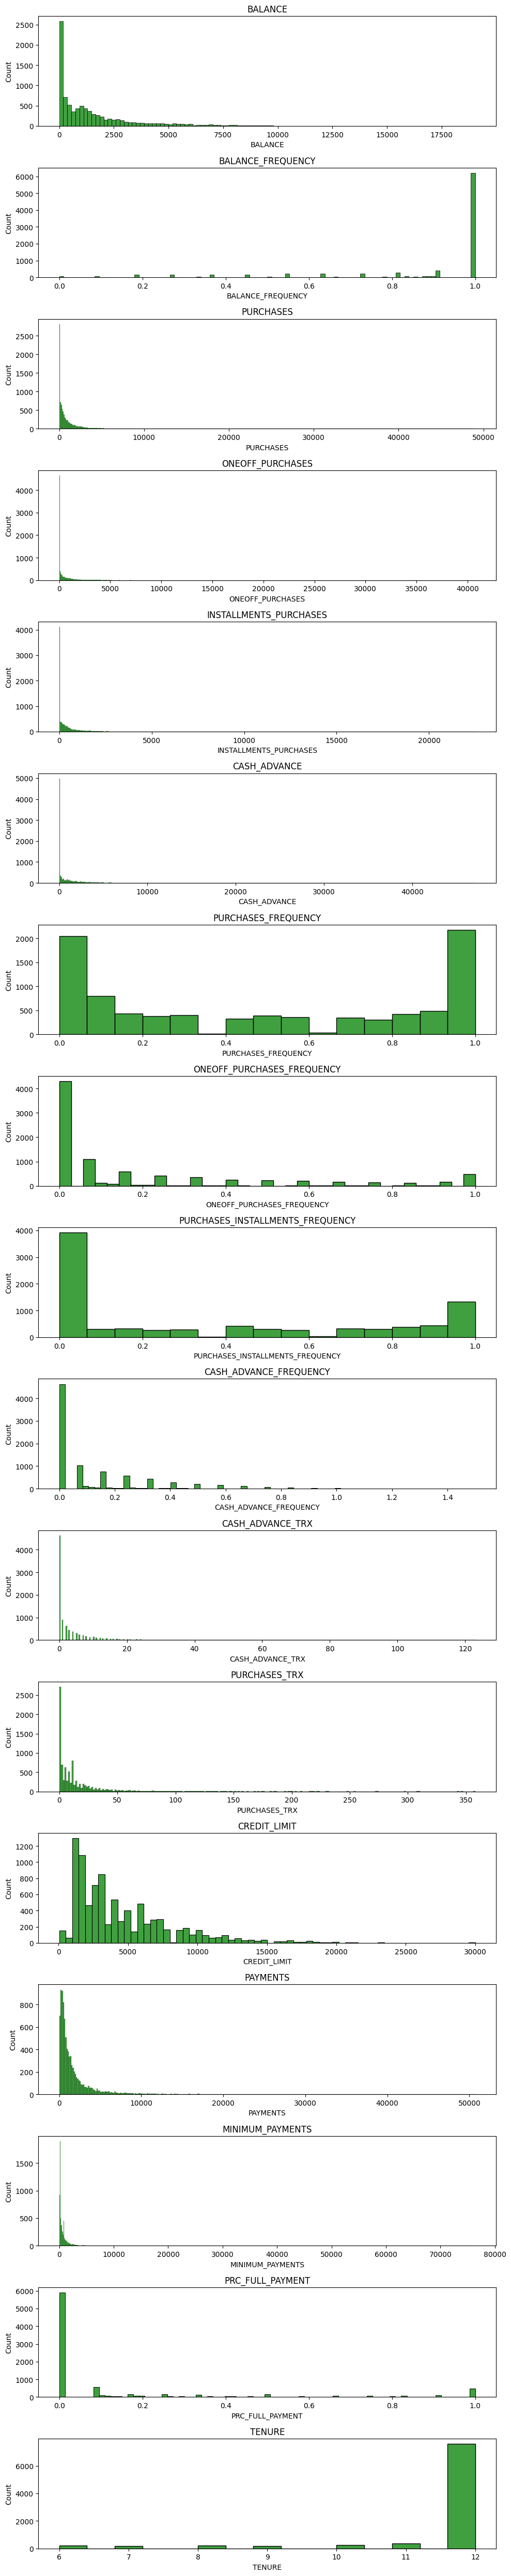

In [18]:
plt.figure(figsize=(10, 50))

for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], color='g')
    plt.title(creditcard_df.columns[i])

plt.tight_layout()
plt.show()

In [19]:
correlations = creditcard_df.corr()

<Axes: >

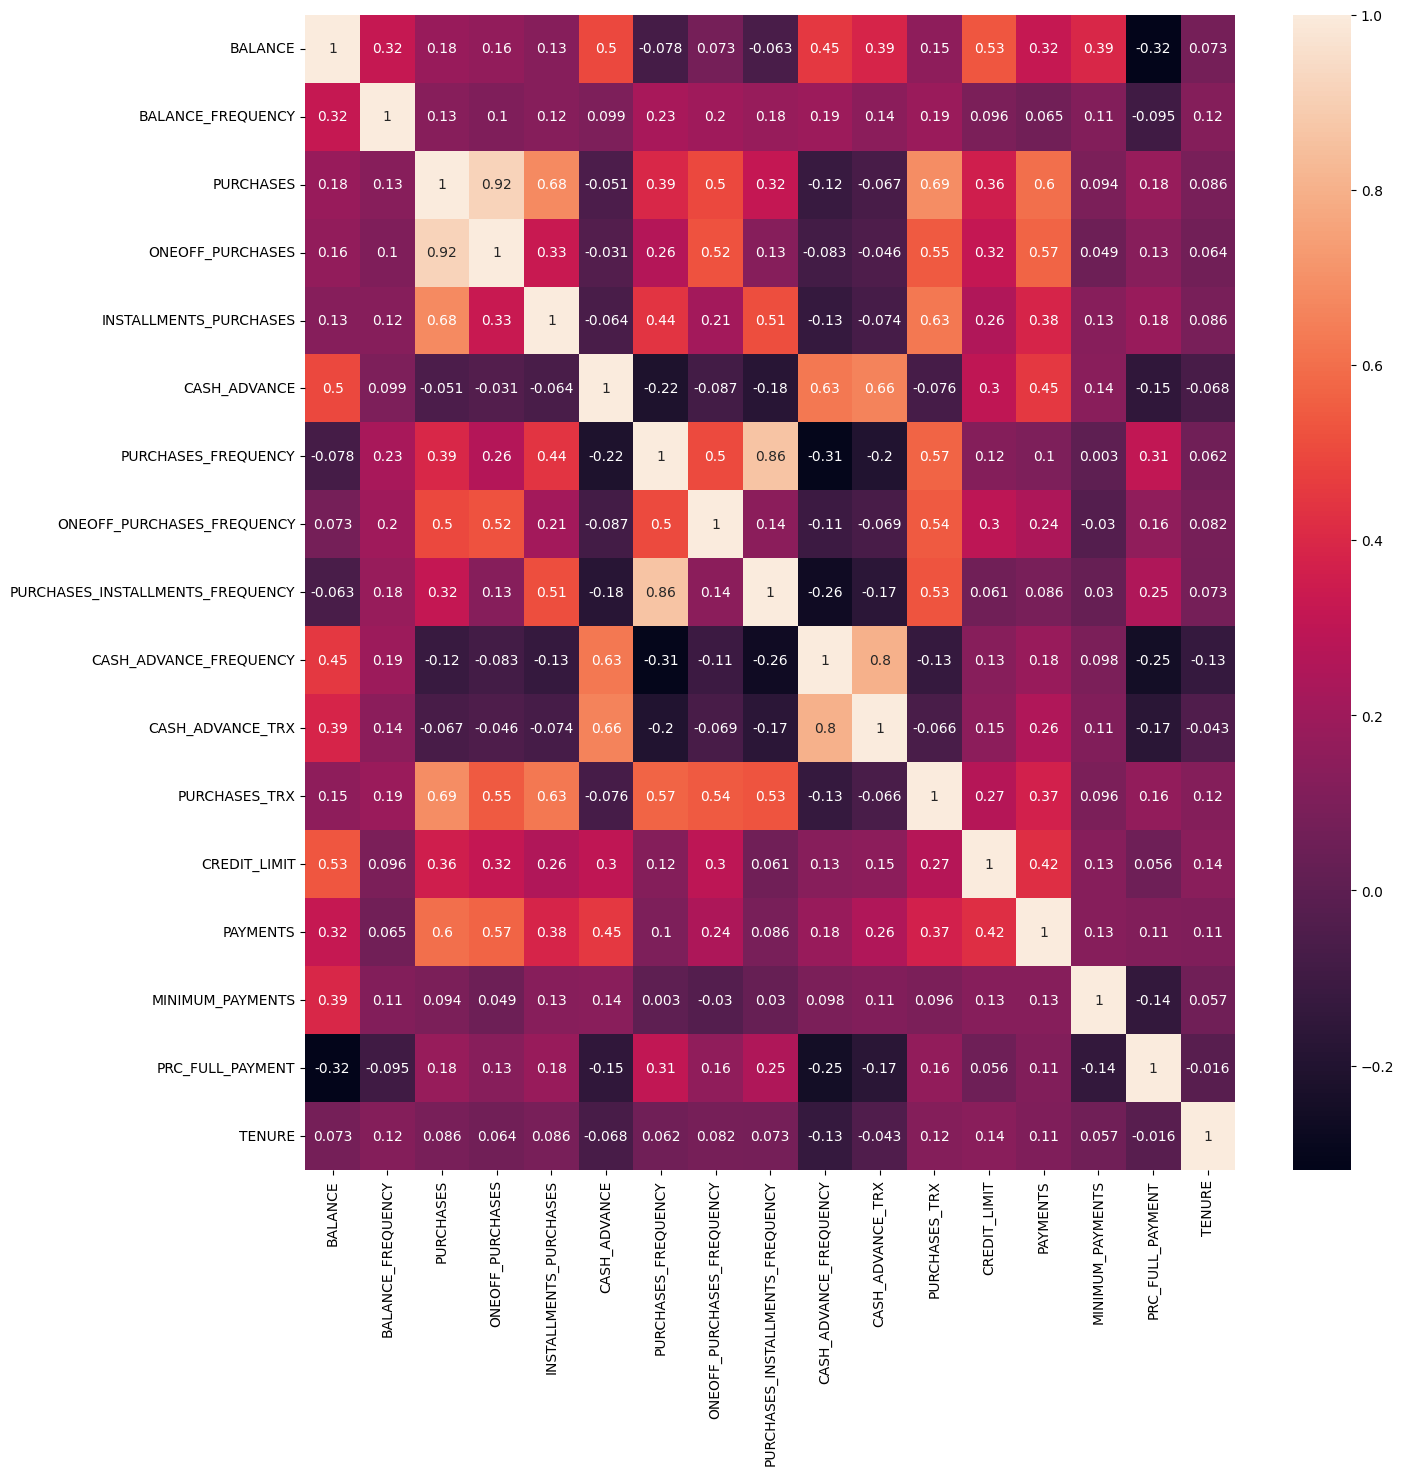

In [20]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlations, annot = True)

# K- Means Cluster

In [21]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [22]:
creditcard_df_scaled.shape

(8950, 17)

In [23]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [24]:
from sklearn.cluster import KMeans
scores_1 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i, n_init = 'auto')
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

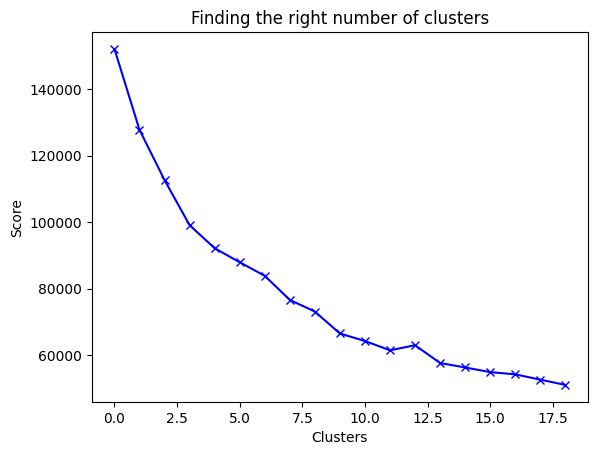

In [25]:
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()


In [26]:
kmeans = KMeans(8, n_init = 'auto')
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [27]:
labels

array([0, 1, 3, ..., 4, 4, 4], dtype=int32)

In [28]:
kmeans.cluster_centers_.shape

(8, 17)

In [29]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.192953,-0.214037,-0.353939,-0.235873,-0.403447,-0.160757,-0.866032,-0.402554,-0.766459,-0.060416,-0.128003,-0.488472,-0.300608,-0.243325,-0.090688,-0.410422,0.269305
1,1.600836,0.401093,-0.242139,-0.173388,-0.254059,1.856635,-0.535730,-0.242571,-0.463447,1.827631,1.792787,-0.297989,0.946778,0.722829,0.543414,-0.404507,0.089644
2,-0.713305,-0.464966,-0.094480,-0.248493,0.232692,-0.444235,0.518997,-0.401380,0.635701,-0.642322,-0.455260,-0.053268,-0.103181,-0.210678,-0.297442,2.184061,0.114842
3,-0.085693,0.420857,0.580426,0.709230,0.069240,-0.323786,1.007223,1.962140,0.196809,-0.404932,-0.326129,0.675453,0.484625,0.164818,-0.146523,0.380467,0.281511
4,-0.335536,-0.462968,-0.294576,-0.209760,-0.310773,0.067515,-0.274357,-0.287551,-0.291775,0.308717,0.000289,-0.401693,-0.560569,-0.393944,-0.201575,-0.107941,-3.172601
5,-0.241796,0.217269,-0.047934,-0.219194,0.289391,-0.328693,0.936145,-0.328401,1.136680,-0.409965,-0.320958,0.187160,-0.296632,-0.207154,0.044078,-0.308725,0.279162
6,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702
7,1.079983,0.476121,2.634192,1.915037,2.710413,-0.124508,1.168549,1.584576,1.274681,-0.268134,-0.125479,3.262264,1.329774,1.549979,0.614098,0.268365,0.335073


In [30]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(cluster_centers, columns = creditcard_df.columns)
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1162.859687,0.826567,247.008161,200.935981,46.235942,641.755411,0.142770,0.082368,0.059827,0.123054,2.375302,2.568237,3400.714573,1028.740921,652.860910,0.033673,11.877717
1,4896.478797,0.972286,485.870588,304.648561,181.325035,4872.322019,0.275336,0.130094,0.180252,0.500872,15.483283,7.302938,7939.214332,3825.662755,2130.610114,0.035403,11.637285
2,79.789771,0.767125,801.346698,179.989645,621.488391,47.289639,0.698649,0.082718,0.617081,0.006609,0.142012,13.385799,4119.032993,1123.252793,171.029410,0.792515,11.671006
3,1386.113099,0.976968,2243.294507,1769.613606,473.680901,299.875975,0.894598,0.787802,0.442654,0.054113,1.023234,31.499071,6257.713755,2210.275818,522.740126,0.264995,11.894052
4,866.083986,0.767598,373.838450,244.278562,130.039121,1120.453886,0.380238,0.116676,0.248479,0.196922,3.250799,4.725240,2454.868663,592.714885,394.445628,0.122144,7.271565
5,1061.196766,0.928740,900.793773,228.619420,672.760489,289.586920,0.866071,0.104489,0.816183,0.053106,1.058523,19.361932,3415.182220,1133.453543,966.929222,0.063418,11.890909
6,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043
7,3812.368472,0.990059,6631.197570,3771.006511,2862.060218,717.771827,0.959346,0.675168,0.871028,0.081488,2.392523,95.797508,9332.710280,6220.182102,2295.336125,0.232207,11.965732


#### First Customer Cluster (Transactors): Customers who pay least amount of interest charges and careful with their money

#### Second Customer Cluster (Revolvers): Customers who use their credit card as a loan (Most Lucrative Sector)

#### Fourth Customer Cluster (Low Tenure): These are customers with low tenure (7 years), low balance

#### Sixth Customer Cluster (VIP/Prime): High Credit Limit $16K and highest percentage of full payment, target for increased credit limit

In [31]:
labels.shape

(8950,)

In [32]:
labels.max()

7

In [33]:
labels.min()

0

In [34]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,4
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,4
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,4
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,4


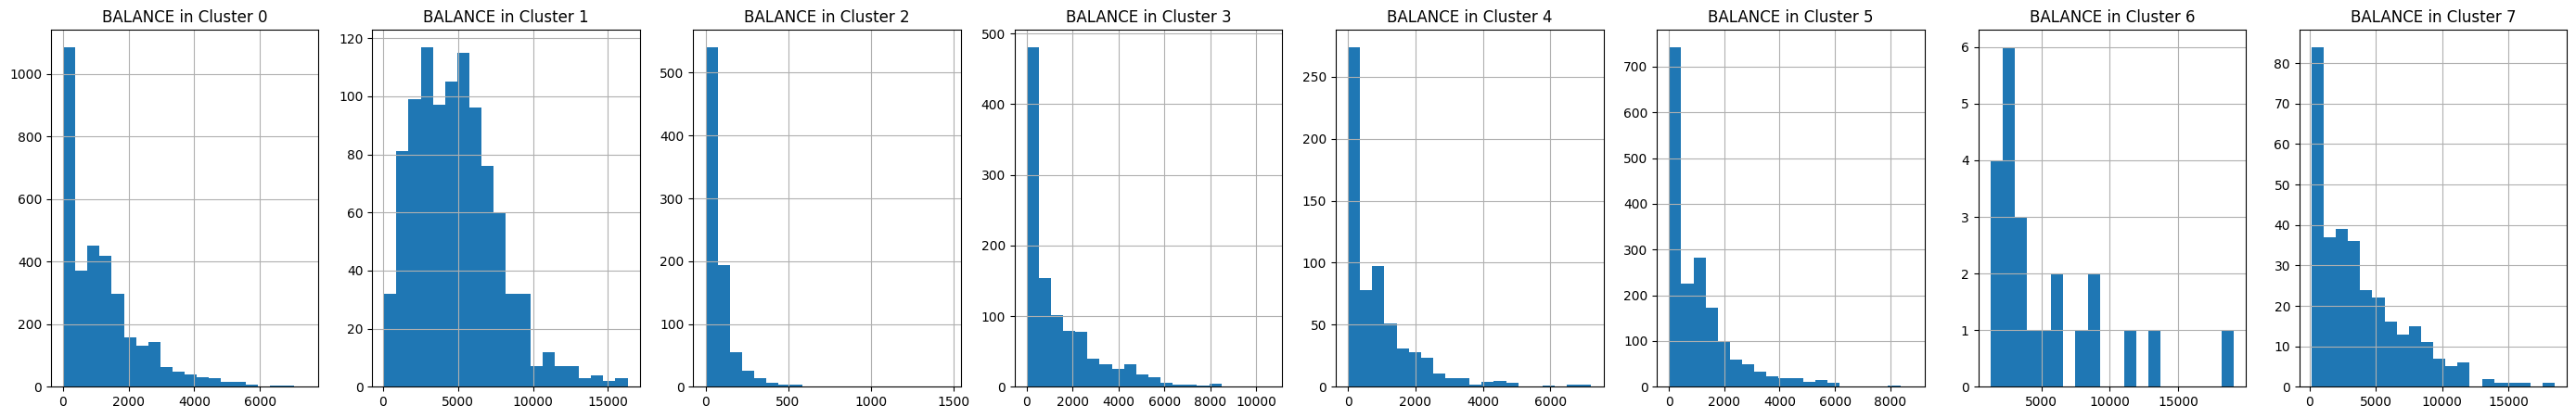

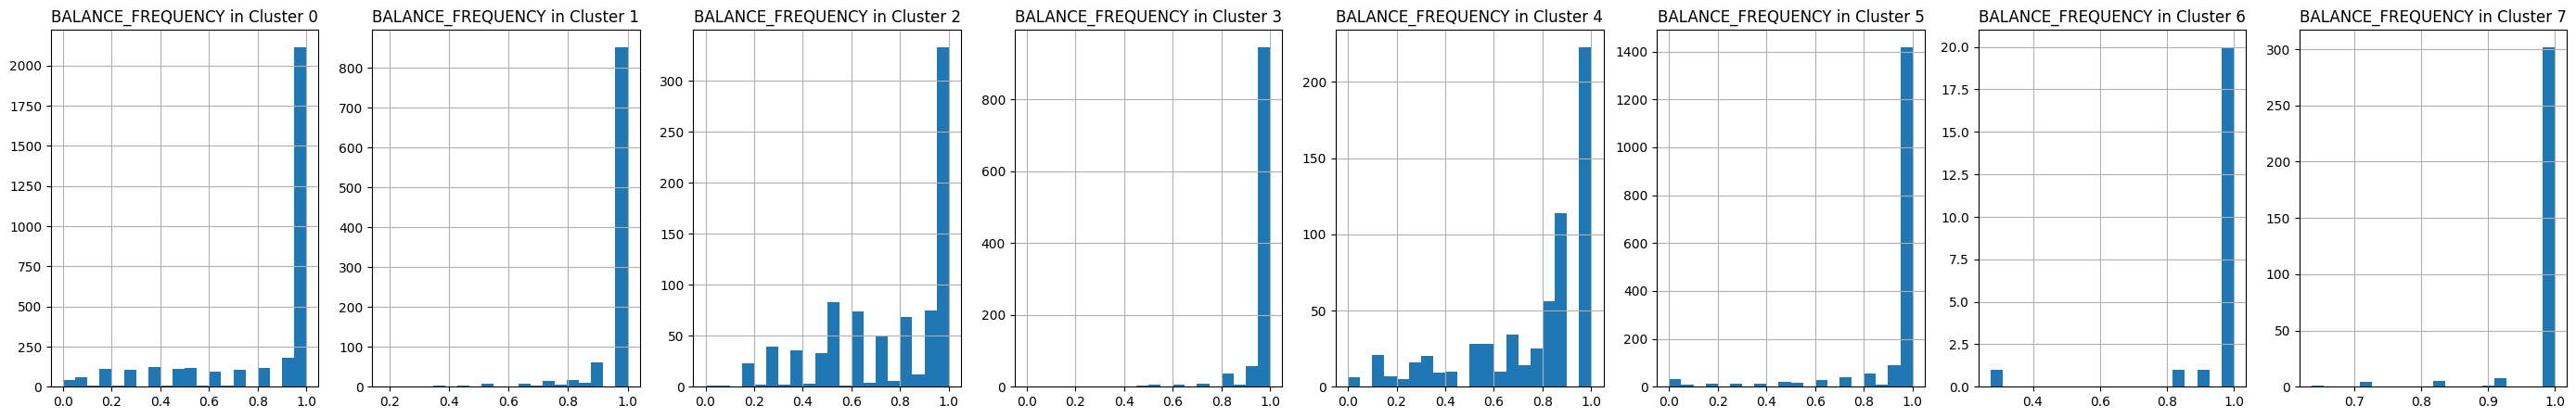

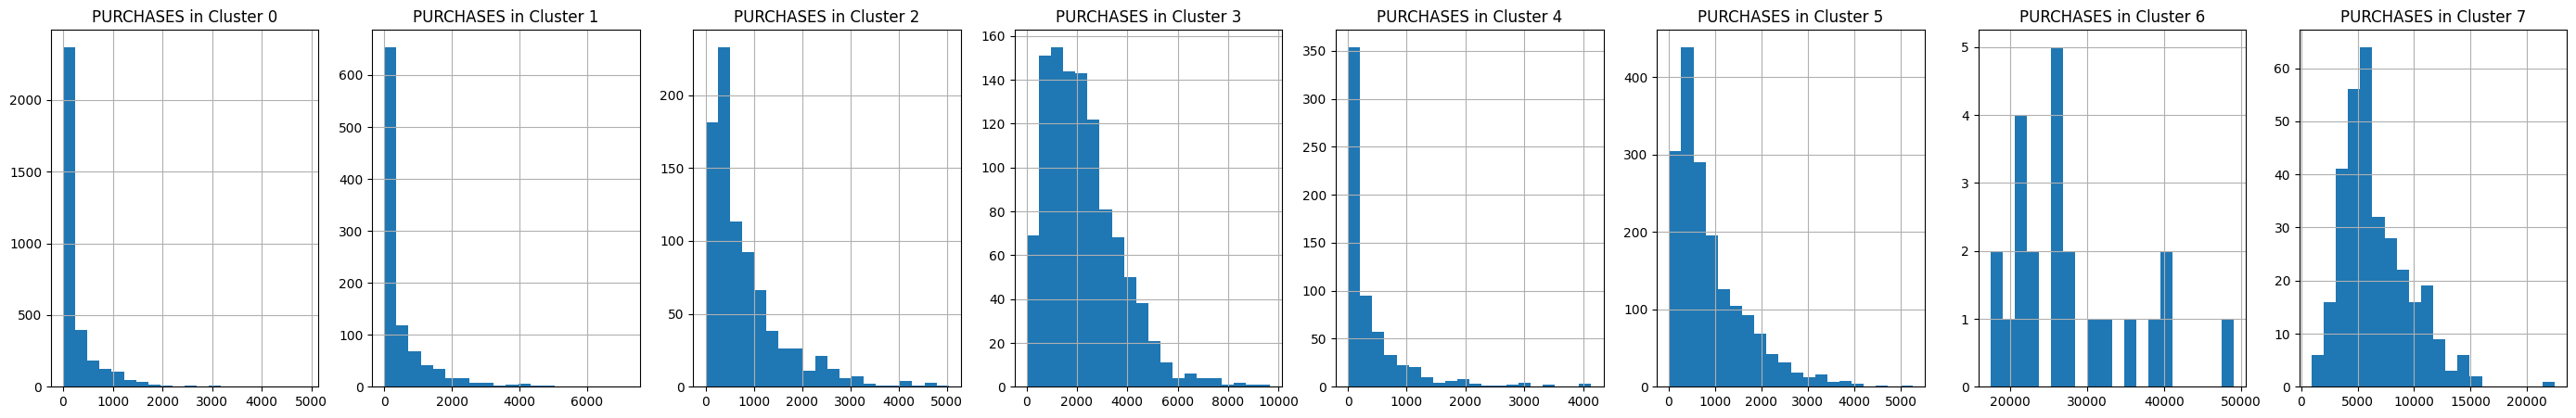

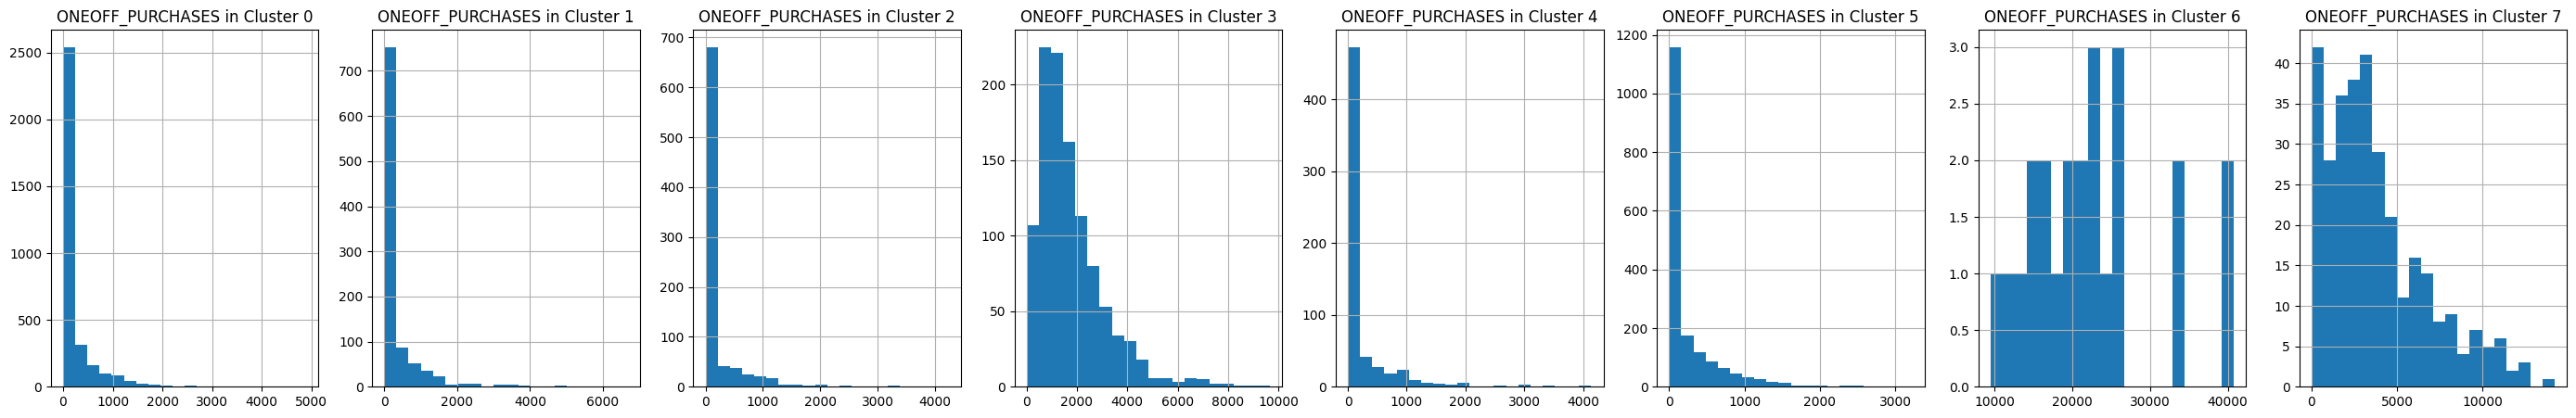

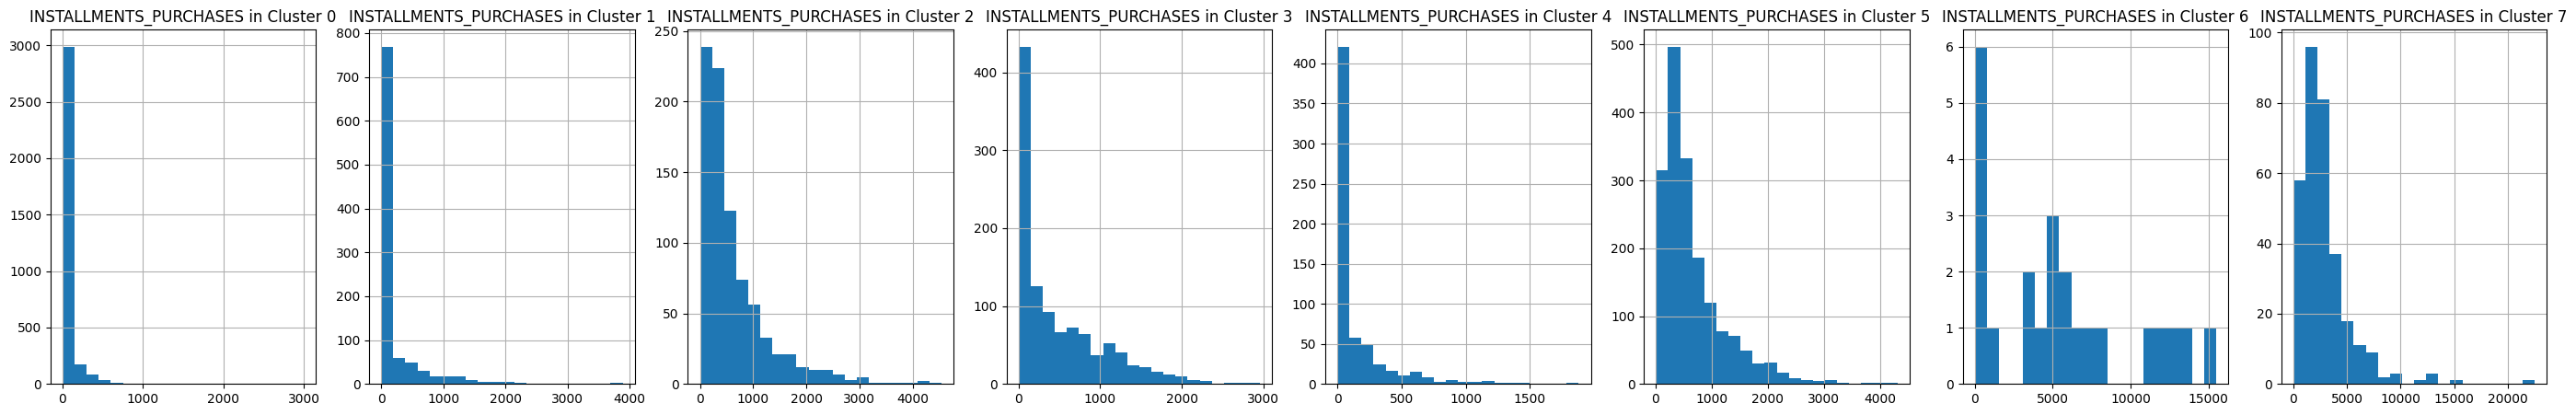

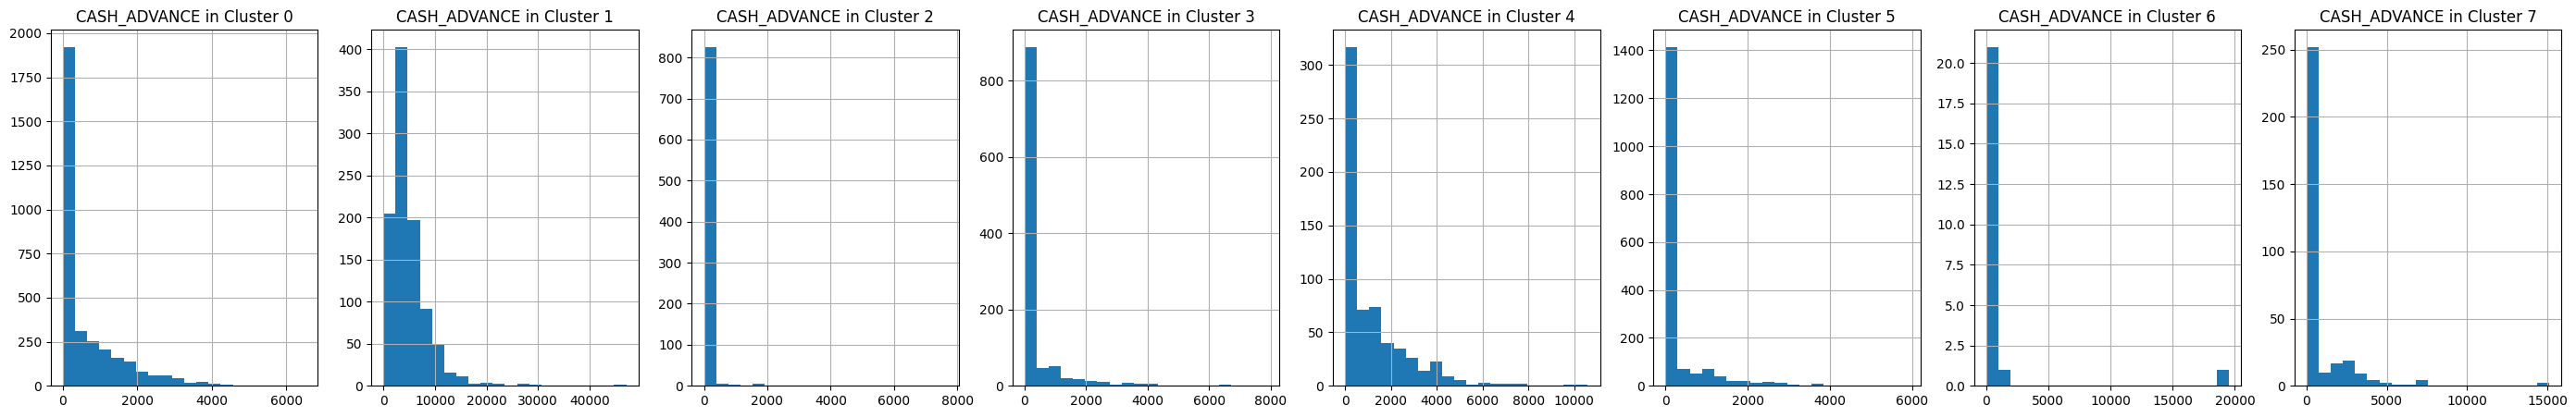

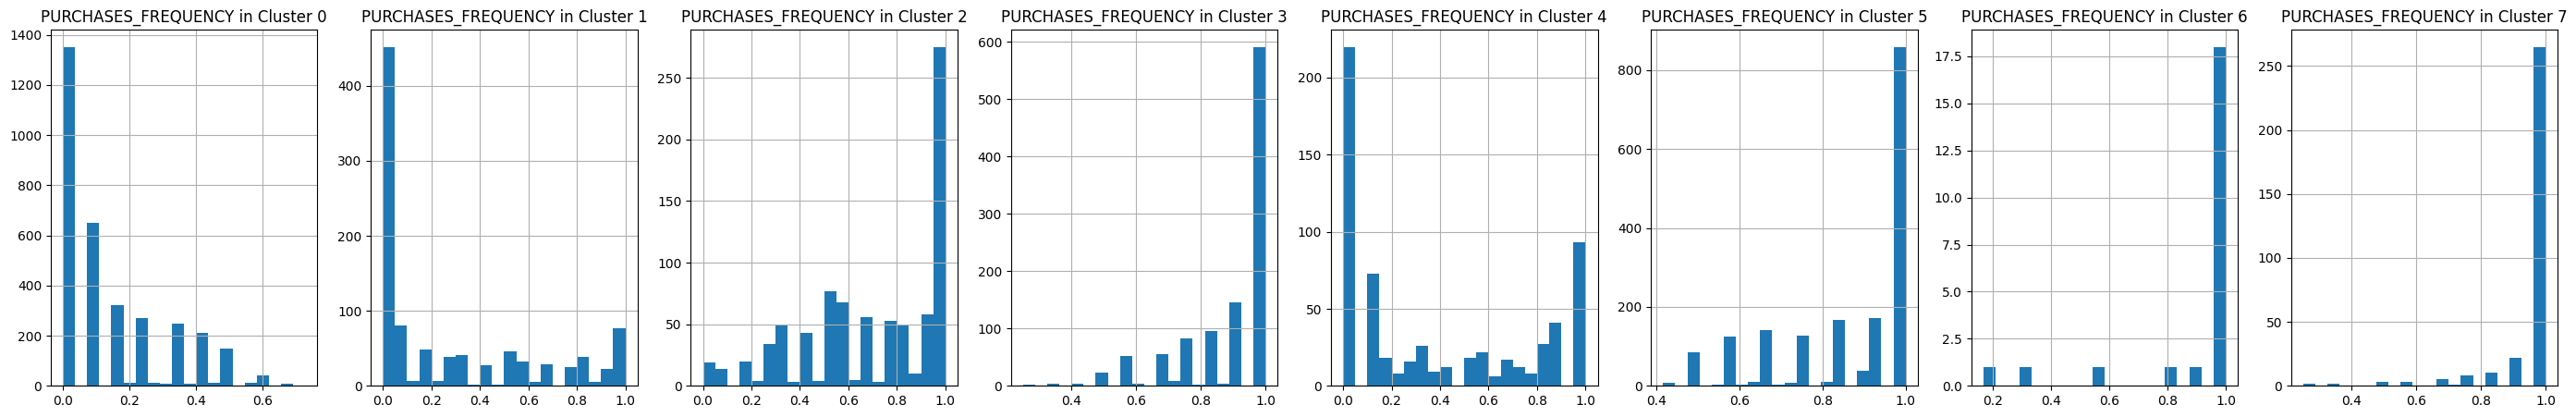

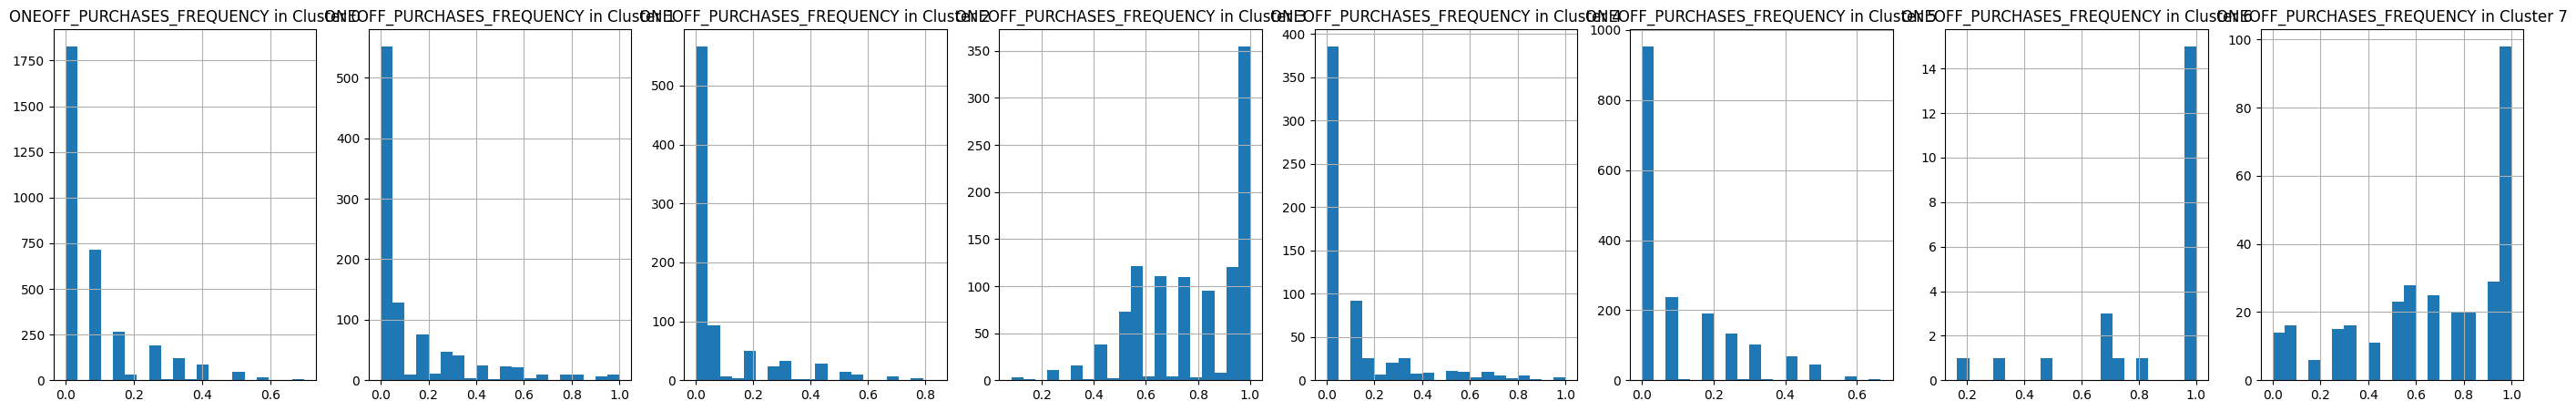

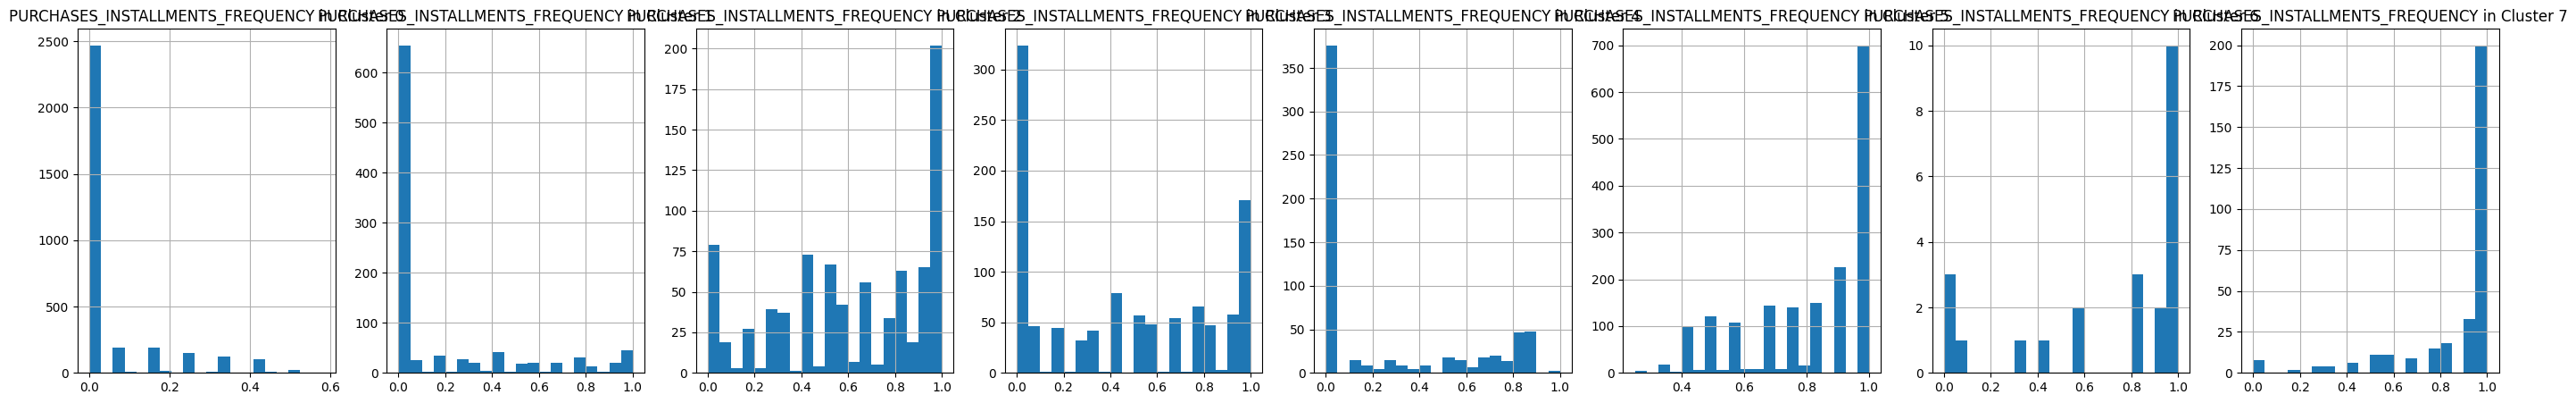

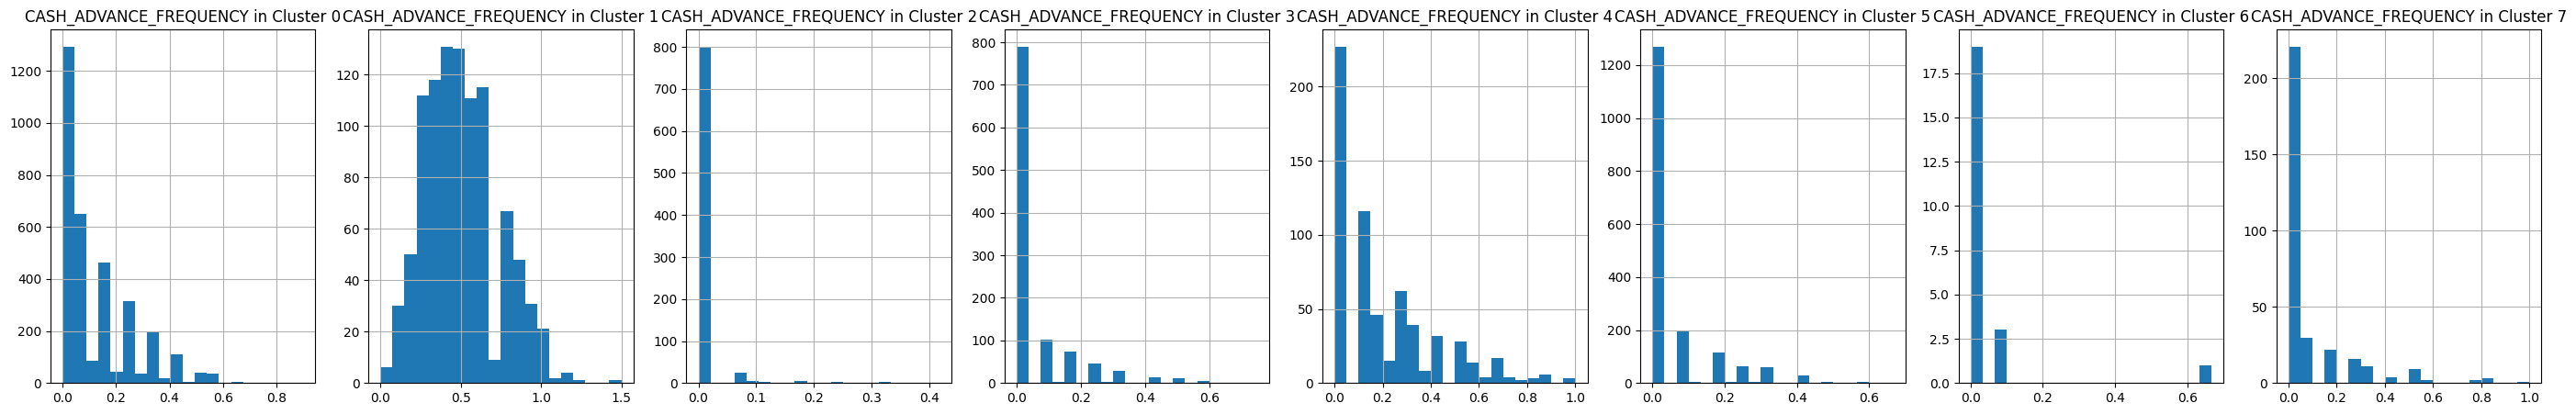

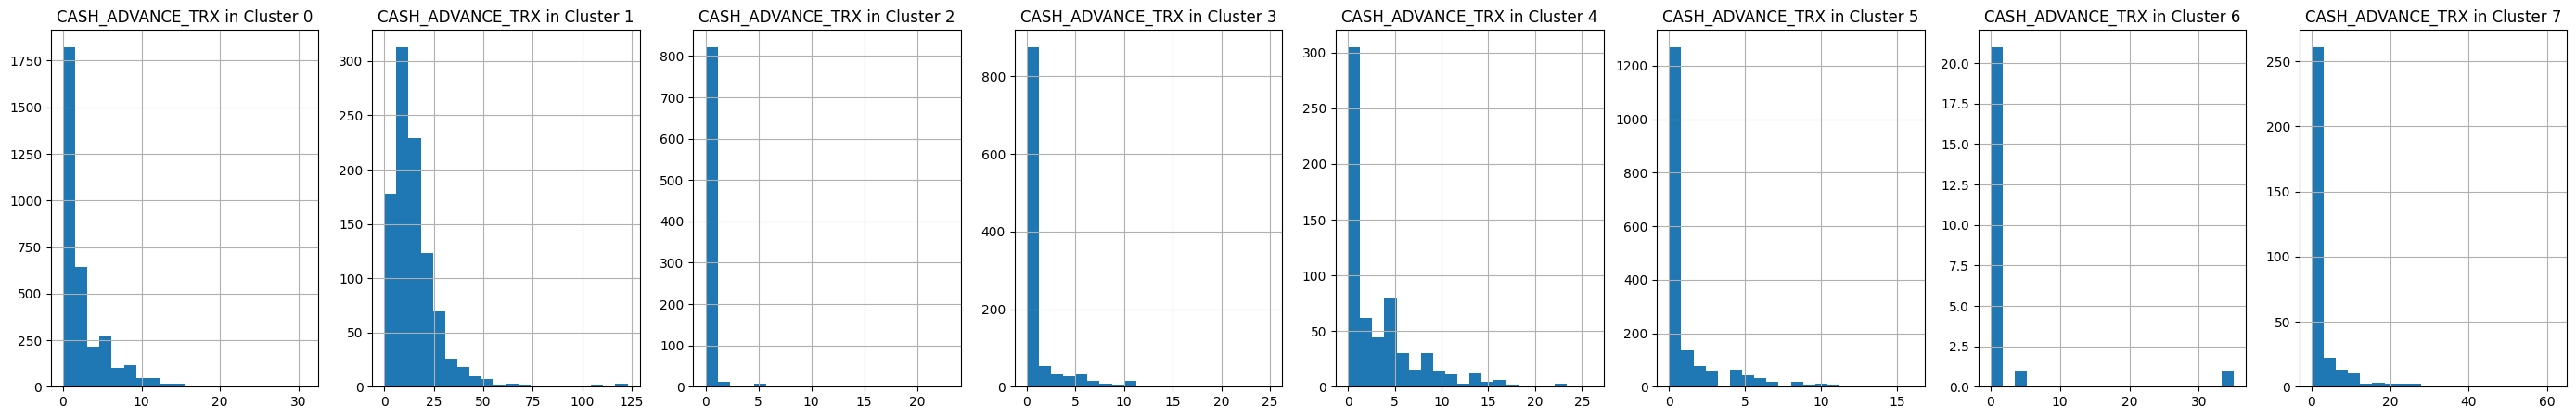

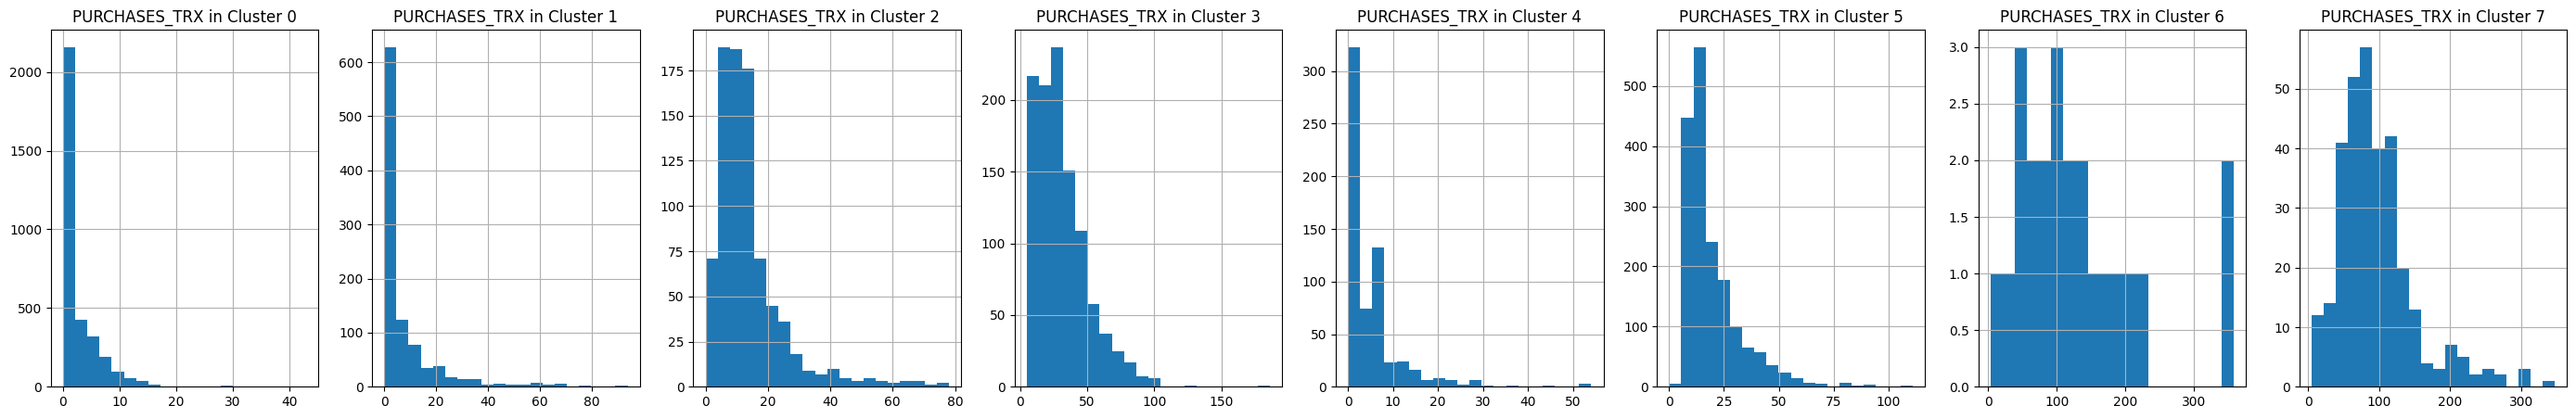

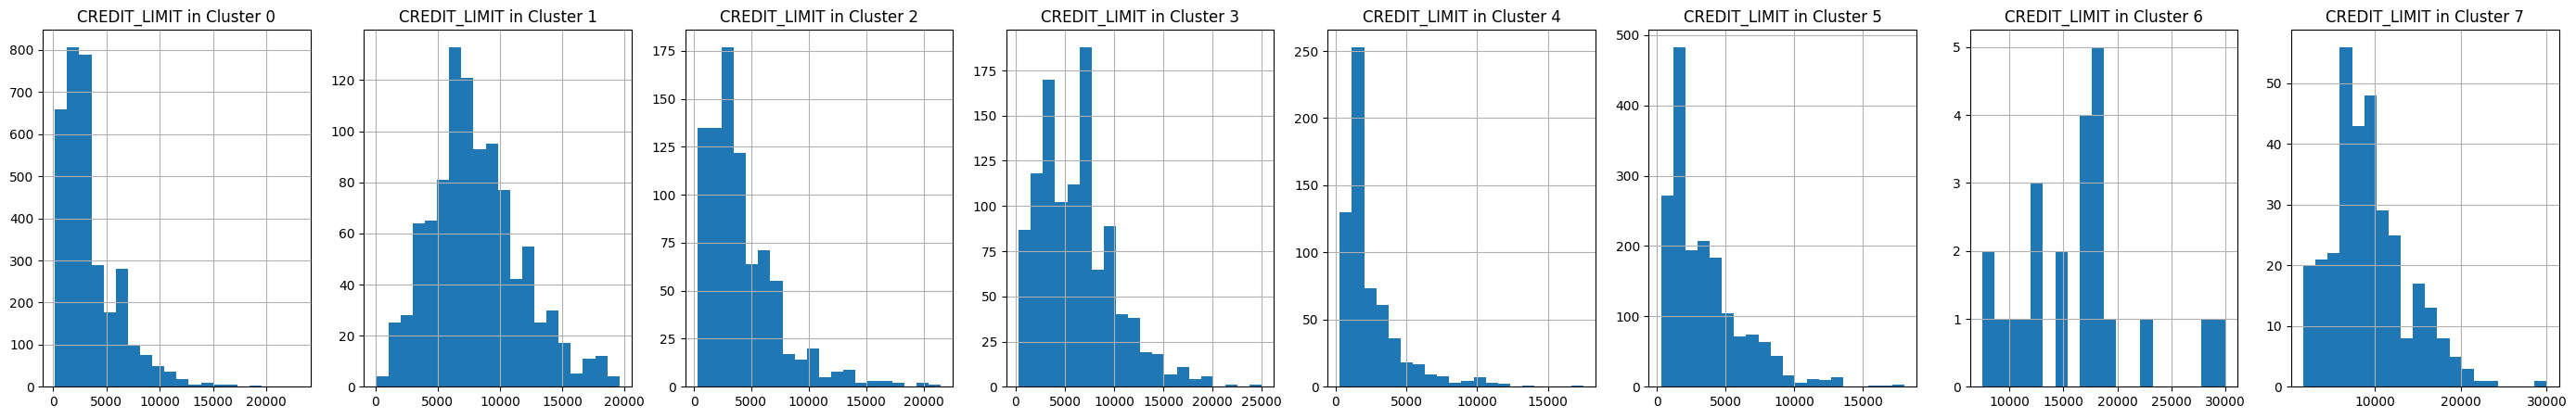

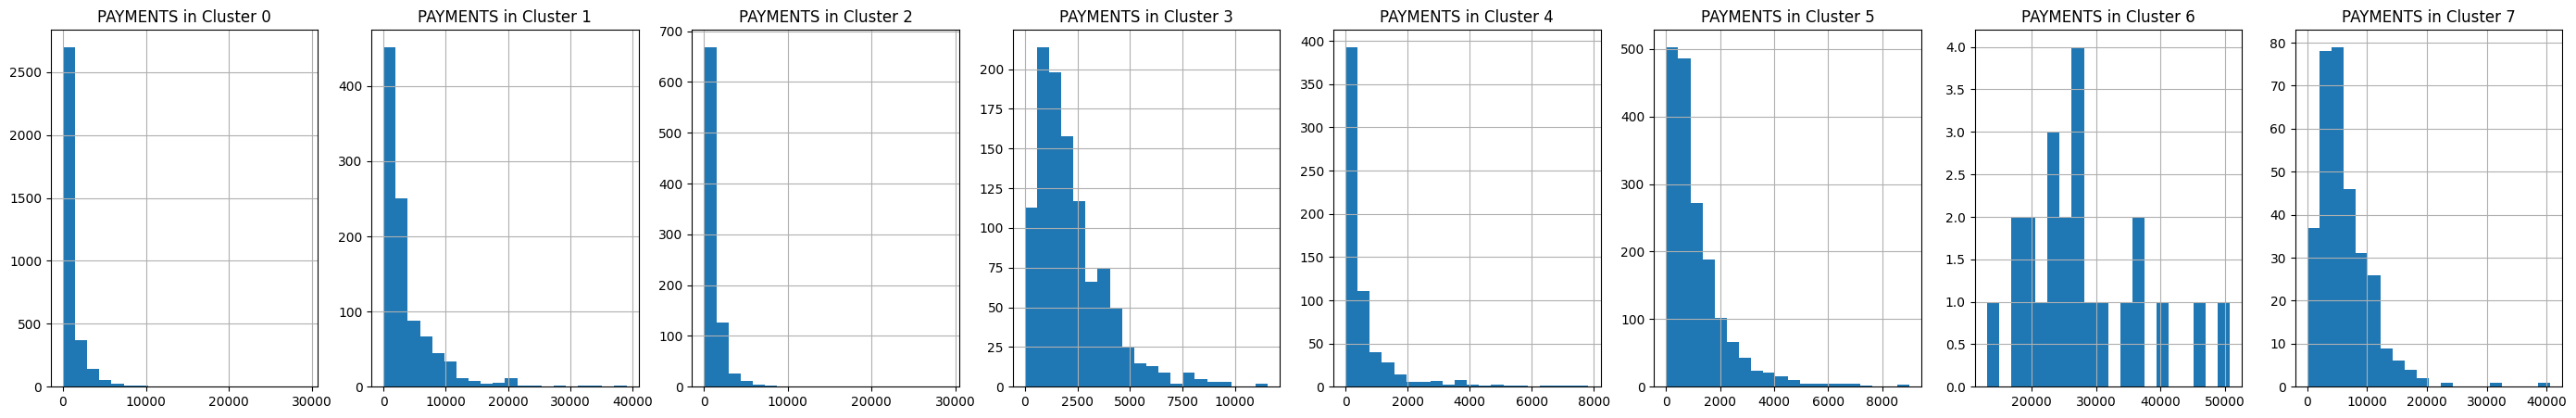

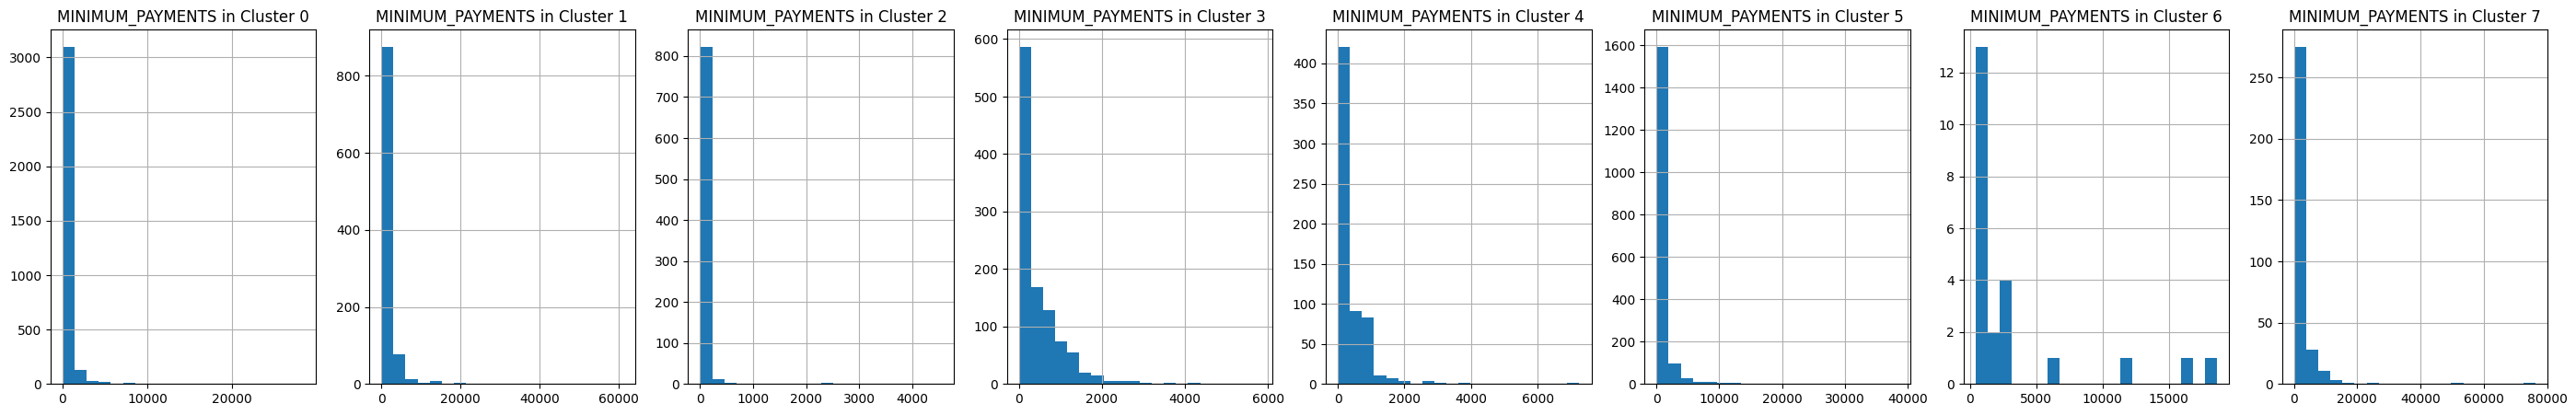

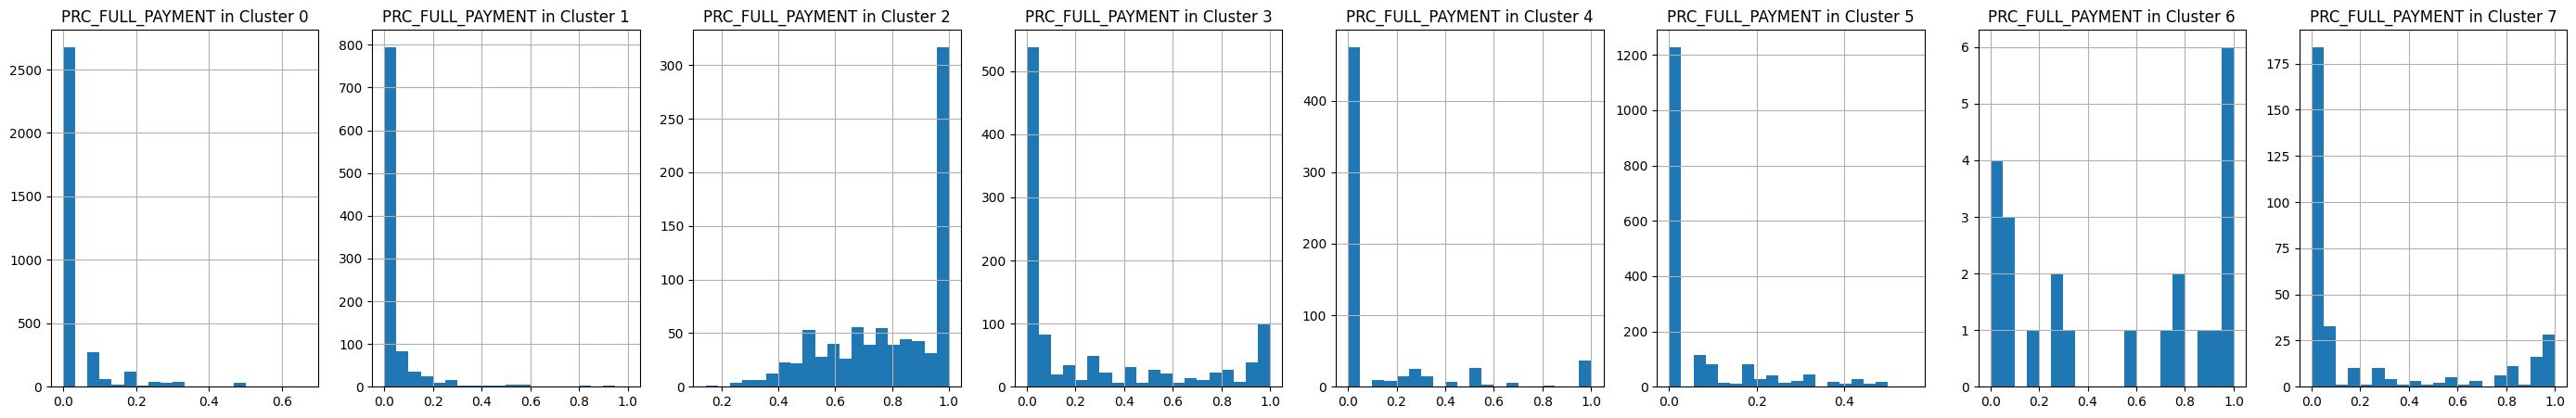

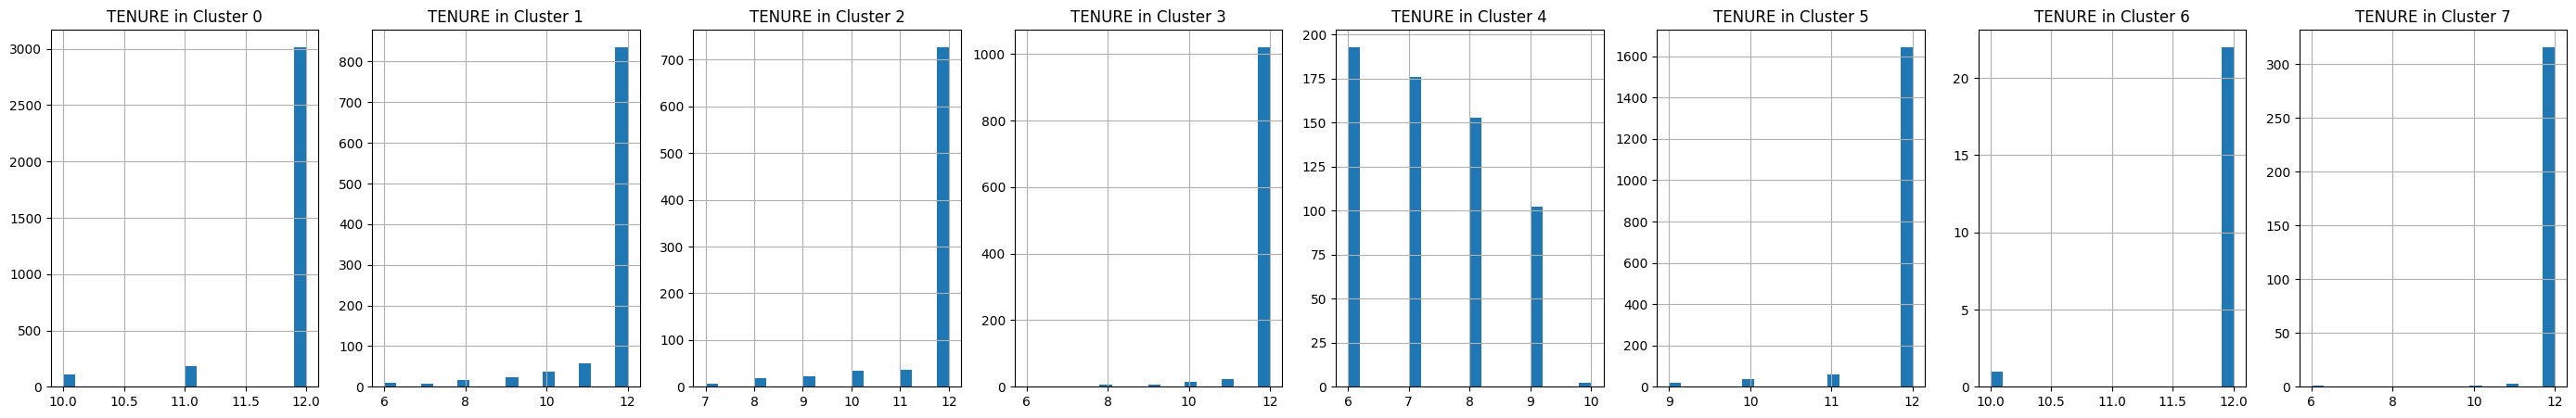

In [35]:
for i in creditcard_df.columns:
  plt.figure(figsize = (35,5))
  for j in range (8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title(i + ' in Cluster ' + str(j))

plt.show()

In [38]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222061, -1.07645162],
       [-1.13829812,  2.50647569],
       [ 0.96968236, -0.38351439],
       ...,
       [-0.92620216, -1.81078673],
       [-2.33654952, -0.65796907],
       [-0.55642144, -0.40046528]])

In [42]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-1.682221,-1.076452
1,-1.138298,2.506476
2,0.969682,-0.383514
3,-0.873629,0.043164
4,-1.599434,-0.688581
...,...,...
8945,-0.359628,-2.016146
8946,-0.564367,-1.639126
8947,-0.926202,-1.810787
8948,-2.336550,-0.657969


In [43]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df

,PCA1,PCA2,cluster
0,-1.682221,-1.076452,0
1,-1.138298,2.506476,1
2,0.969682,-0.383514,3
3,-0.873629,0.043164,0
4,-1.599434,-0.688581,0
...,...,...,...
8945,-0.359628,-2.016146,4
8946,-0.564367,-1.639126,4
8947,-0.926202,-1.810787,4
8948,-2.336550,-0.657969,4


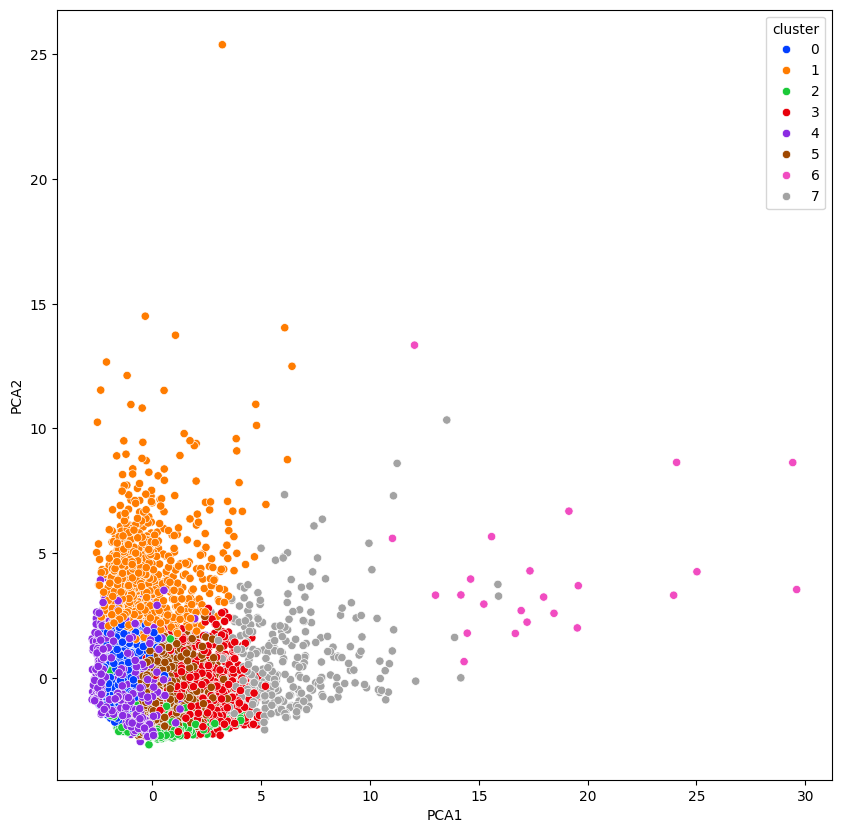

In [45]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df, palette = 'bright')


In [48]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [53]:
input_df = Input(shape = (17,))

x = Dense(7, activation ='relu')(input_df)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

autoencoder = Model(input_df, decoded)

encoder = Model(input_df, encoded)

autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [54]:
creditcard_df_scaled.shape

(8950, 17)

In [55]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 20, verbose =1)

Epoch 1/20
70/70 [==============================] - 11s 111ms/step - loss: 0.5787
Epoch 2/20
70/70 [==============================] - 5s 71ms/step - loss: 0.3003
Epoch 3/20
70/70 [==============================] - 5s 67ms/step - loss: 0.2438
Epoch 4/20
70/70 [==============================] - 7s 96ms/step - loss: 0.1992
Epoch 5/20
70/70 [==============================] - 5s 72ms/step - loss: 0.1743
Epoch 6/20
70/70 [==============================] - 5s 71ms/step - loss: 0.1574
Epoch 7/20
70/70 [==============================] - 6s 90ms/step - loss: 0.1488
Epoch 8/20
70/70 [==============================] - 5s 66ms/step - loss: 0.1375
Epoch 9/20
70/70 [==============================] - 6s 86ms/step - loss: 0.1280
Epoch 10/20
70/70 [==============================] - 6s 87ms/step - loss: 0.1177
Epoch 11/20
70/70 [==============================] - 5s 65ms/step - loss: 0.1067
Epoch 12/20
70/70 [==============================] - 5s 76ms/step - loss: 0.0983
Epoch 13/20
70/70 [================

In [57]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_8 (Dense)             (None, 7)                 126       
                                                                 
 dense_9 (Dense)             (None, 500)               4000      
                                                                 
 dense_10 (Dense)            (None, 500)               250500    
                                                                 
 dense_11 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_12 (Dense)            (None, 10)                20010     
                                                                 
 dense_13 (Dense)            (None, 2000)              2200

In [61]:
pred = encoder.predict(creditcard_df_scaled)
pred

280/280 [==============================] - 4s 13ms/step


array([[0.696584  , 0.6633471 , 1.4234939 , ..., 1.3338757 , 0.        ,
        0.        ],
       [3.405117  , 0.683032  , 3.2614331 , ..., 1.3498712 , 0.        ,
        0.        ],
       [0.5141451 , 0.12877482, 0.70930135, ..., 1.8237379 , 0.        ,
        0.        ],
       ...,
       [0.01709414, 1.7432411 , 2.7449653 , ..., 0.91718584, 0.        ,
        0.        ],
       [1.2682872 , 1.2095091 , 3.7404392 , ..., 0.92636555, 0.        ,
        0.        ],
       [1.3125488 , 0.23566672, 2.9403863 , ..., 1.9647671 , 0.        ,
        0.        ]], dtype=float32)

In [62]:
pred.shape

(8950, 10)

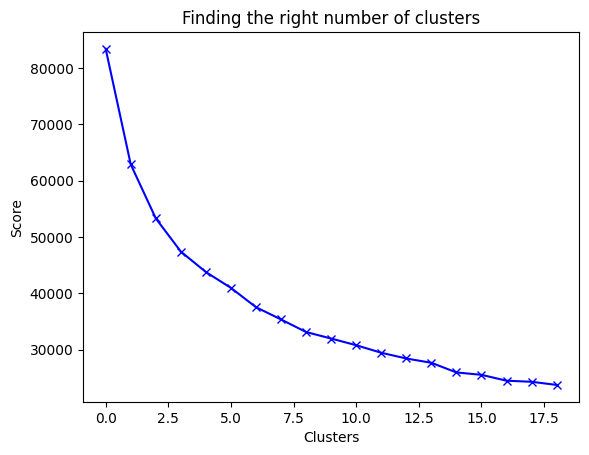

In [69]:
from sklearn.cluster import KMeans
scores_2 = []
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i, n_init = 'auto')
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.show()

<ipython-input-75-b75c6505e11f>:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_1, 'bx-', color = 'r')
<ipython-input-75-b75c6505e11f>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(scores_2, 'bx-', color = 'b')


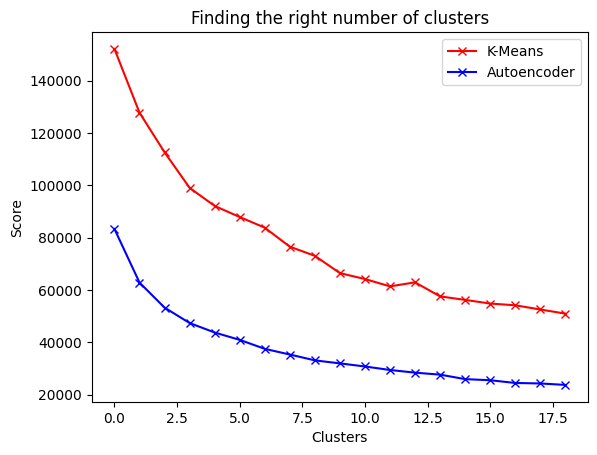

In [75]:
plt.plot(scores_1, 'bx-', color = 'r')
plt.plot(scores_2, 'bx-', color = 'b')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Score')
plt.legend(['K-Means', 'Autoencoder'])
plt.show()

In [77]:
kmeans = KMeans(4, n_init = 'auto')
kmeans.fit(pred)
labels = kmeans.labels_



In [78]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [79]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = principal_comp, columns = ['PCA1', 'PCA2'])
pca_df

,PCA1,PCA2
0,-1.022923,-0.483726
1,1.380353,-1.618861
2,-1.299642,0.532246
3,-0.007370,-0.423172
4,-1.131952,-0.437334
...,...,...
8945,-0.480683,-0.196061
8946,0.609629,-0.076317
8947,0.023570,-0.259014
8948,0.747578,-1.173321


In [80]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df

,PCA1,PCA2,cluster
0,-1.022923,-0.483726,3
1,1.380353,-1.618861,0
2,-1.299642,0.532246,3
3,-0.007370,-0.423172,0
4,-1.131952,-0.437334,3
...,...,...,...
8945,-0.480683,-0.196061,0
8946,0.609629,-0.076317,0
8947,0.023570,-0.259014,0
8948,0.747578,-1.173321,0


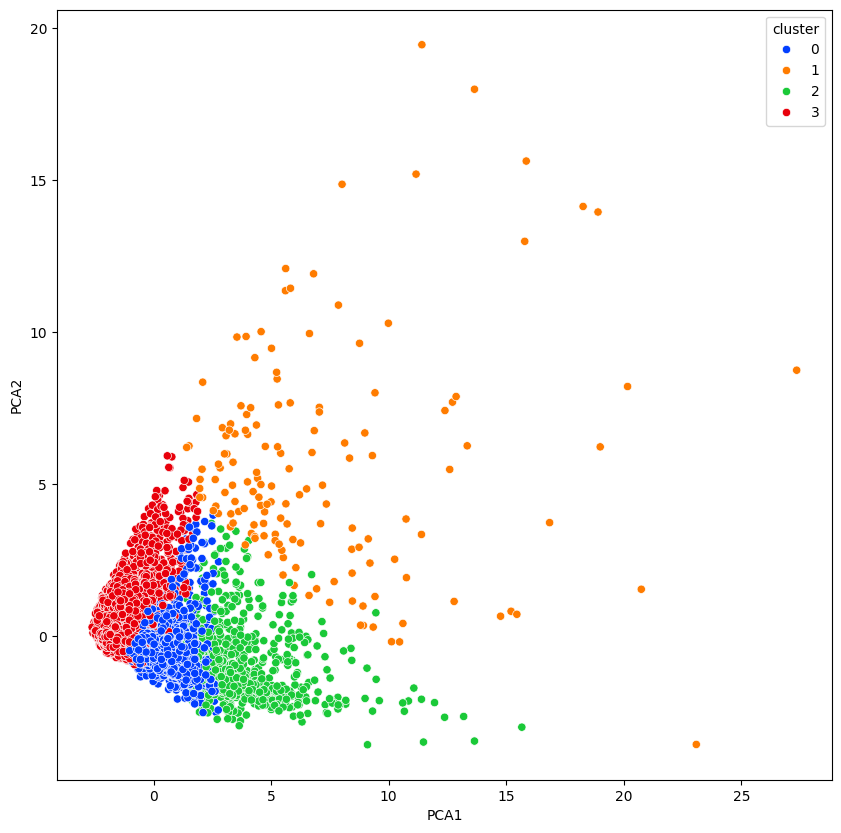

In [81]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'cluster', data = pca_df, palette = 'bright')